In [210]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots we will create

# Read in data
df = pd.read_csv(r'C:\Users\antua\Downloads\movies.csv\movies.csv')

# Let's look at the data
df




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [172]:
# Screen resetting.
pd.reset_option('^display.', silent=True)

In [162]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
year_correct - 0%


In [32]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [54]:
# change data type of columns
# df['budget'] = df['budget'].astype('int64')
# df['gross'] = df['gross'].astype('int64')

# Fill NaN values with 0
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')




In [212]:
# Create correct year column
# Split by space and extract the year
df['year_correct'] = df['released'].astype(str).str.split(', ').str[-1].str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [222]:
grouping_columns = df.groupby(['company', 'year'])[["gross"]].sum()
grouping_columns.sort_values(by=['gross'], inplace=False, ascending=False)

,,gross
company,year,
Walt Disney Pictures,2019,5.773132e+09
Marvel Studios,2018,4.018632e+09
Universal Pictures,2015,3.834355e+09
Twentieth Century Fox,2009,3.793491e+09
Walt Disney Pictures,2017,3.789382e+09
...,...,...
Bakshi Productions,1981,0.000000e+00
Greek Film Center,1995,0.000000e+00
Big Easy Pictures,2006,0.000000e+00


In [214]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [224]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [78]:
# My guesses:
# Budget high correlation
# Company High correlation



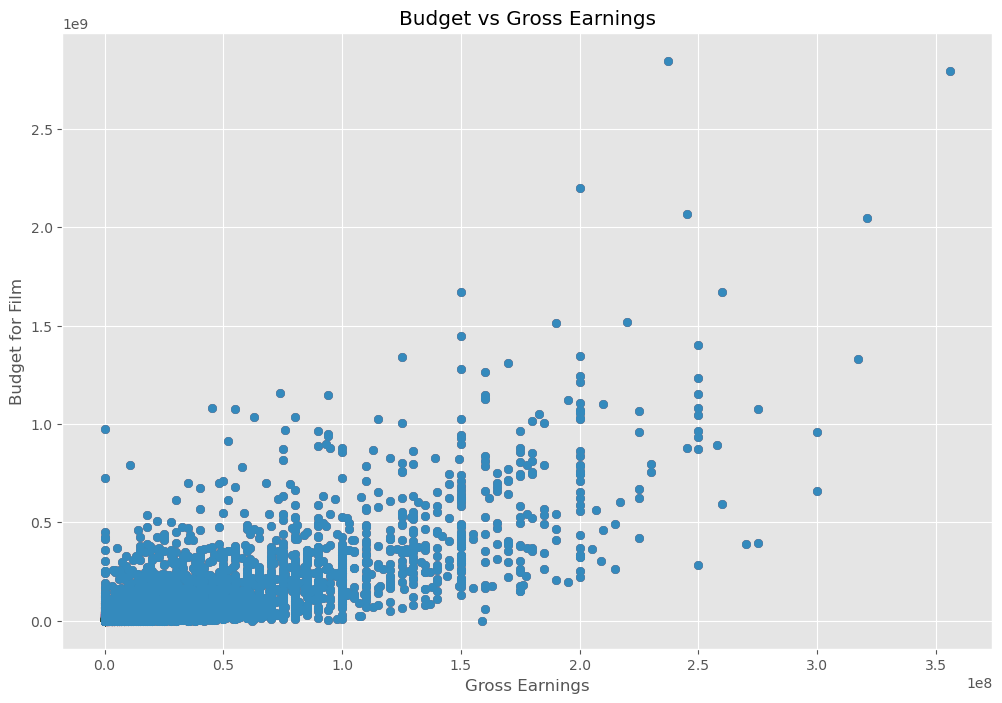

In [100]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')


plt.show()

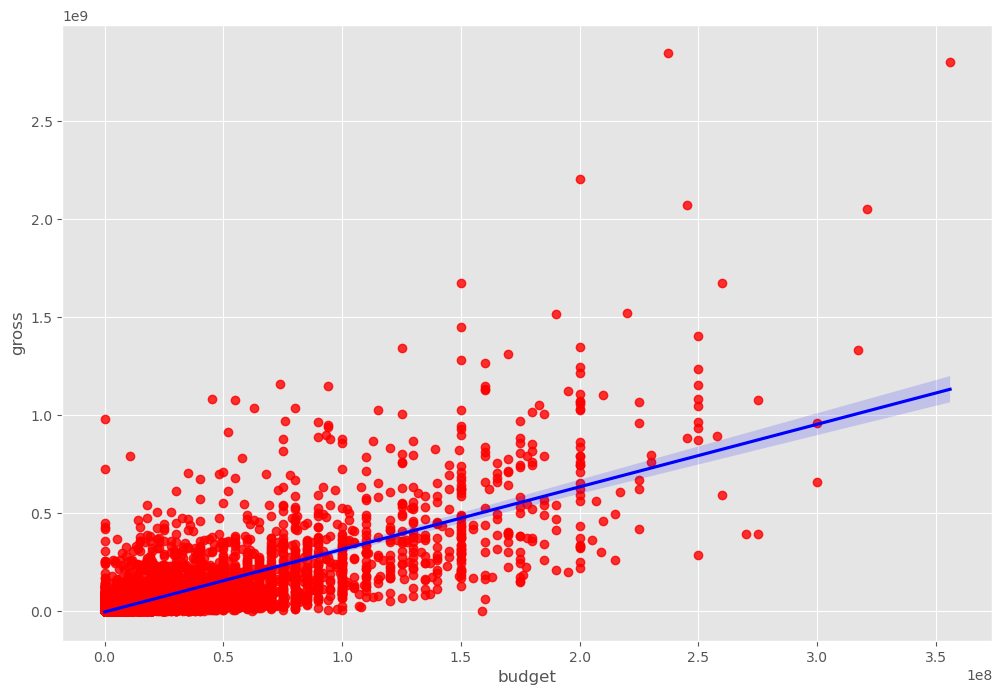

In [122]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.show()




In [132]:
df.corr(method = 'spearman', numeric_only ='True')

,score,votes,budget,gross,runtime
score,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.428138,1.000000,0.604693,0.752550,0.289726
budget,-0.007500,0.604693,1.000000,0.716816,0.246748
gross,0.132569,0.752550,0.716816,1.000000,0.256783
runtime,0.399857,0.289726,0.246748,0.256783,1.000000


In [134]:
# High correlation between budget and gross 
# I was right


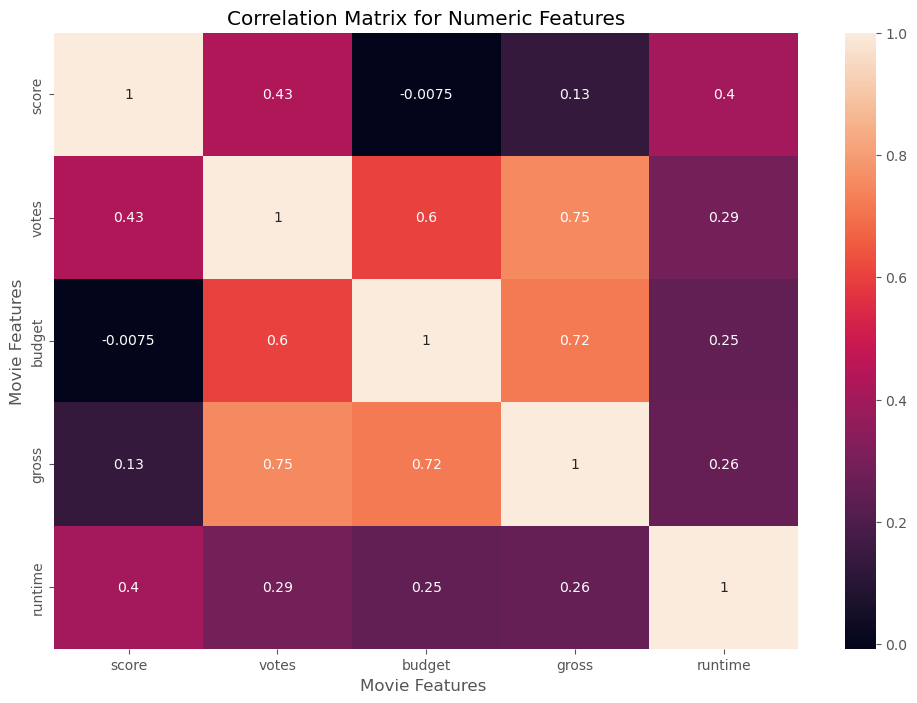

In [142]:
correlation_matrix = df.corr(method = 'spearman', numeric_only ='True')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features ')

plt.ylabel('Movie Features')

plt.show()
            

In [144]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [206]:
df_numerized = df.copy()

for col_name in df_numerized:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,29,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,3078
7445,535,5,0,39,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,925
3045,6896,5,6,17,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,3088
6663,5144,5,0,35,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,3080
7244,536,5,0,38,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1925,5,4,9,194,4.5,653,1881,3857,480,55,0,0,879,92.0,1047
1629,4582,6,0,9,3327,4.3,1100,2631,144,1857,55,0,0,470,107.0,2589
1617,3712,6,5,10,1277,4.5,274,117,82,2797,55,0,0,1159,92.0,311
1614,1745,6,10,9,55,5.2,1300,1033,1743,166,54,0,0,146,85.0,2916


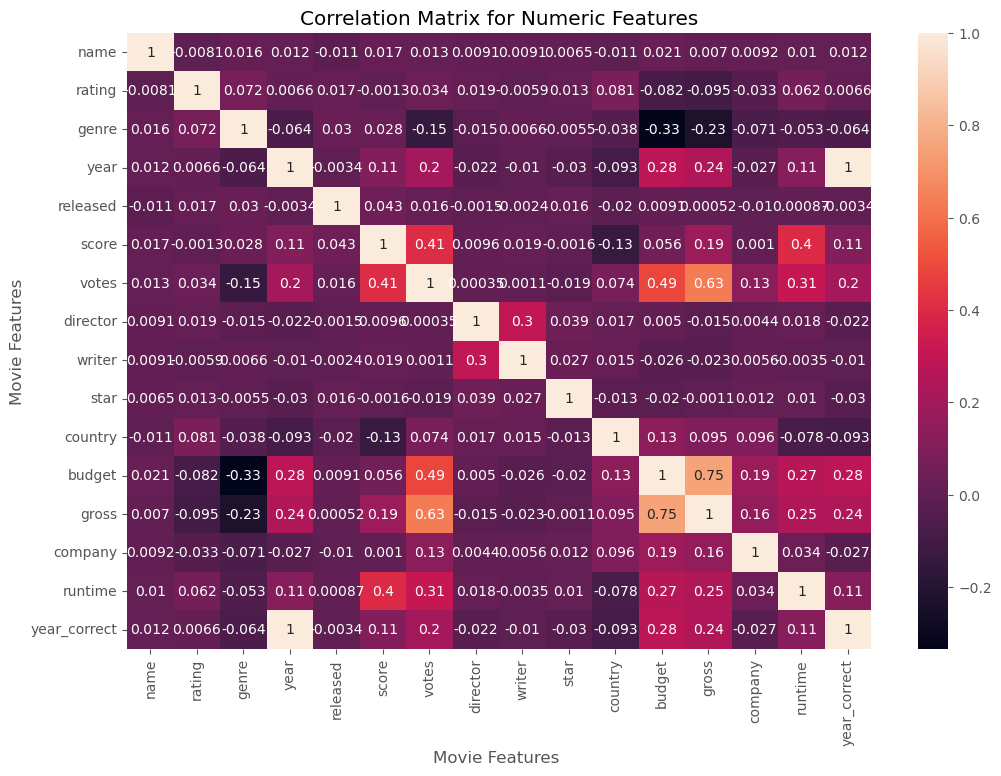

In [148]:
correlation_matrix = df_numerized.corr(method = 'pearson', numeric_only ='True')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features ')

plt.ylabel('Movie Features')

plt.show()

In [180]:
correlation_mat = df_numerized.corr(numeric_only = 'True')

corr_pairs = correlation_mat.unstack()

corr_pairs 

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011711
              released       -0.011311
                                ...   
year_correct  budget         -0.025596
              gross          -0.024265
              company        -0.023268
              runtime         0.021713
              year_correct    1.000000
Length: 256, dtype: float64

In [182]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [154]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            1.000000
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year_correct    1.000000
              year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings 

# Company has low correlation 
# I was wrong 